In [133]:
import pandas as pd
import numpy as np

In [134]:
# Reading Data
df_resale = pd.read_csv('Private_Housing_sorted.csv')
df_resale['Address'] = df_resale['address']

folder = 'Non-Landed Sorted Data'
df_cc = pd.read_csv('./Non-Landed Sorted Data/CC_NEW.csv')
df_cc = df_cc.rename(columns={'0' : 'Address','1' : 'CC','2' : 'distance_cc'})
df_cc['distance_cc'] = df_cc['distance_cc'].str[:-2].astype(float)
df_cc = df_cc.drop(['CC'], axis=1)

df_hawker = pd.read_csv('./Non-Landed Sorted Data/hawker_NEW.csv')
df_hawker = df_hawker.rename(columns={'0' : 'Address','1' : 'hawker','2' : 'distance_hawker'})
df_hawker['distance_hawker'] = df_hawker['distance_hawker'].str[:-2].astype(float)
df_hawker = df_hawker.drop(['hawker'], axis=1)

df_mrt = pd.read_csv('./Non-Landed Sorted Data/MRT_NEW.csv')
df_mrt = df_mrt.rename(columns={'0' : 'Address','1' : 'MRT','2' : 'distance_mrt'})
df_mrt['distance_mrt'] = df_mrt['distance_mrt'].str[:-2].astype(float)
df_mrt = df_mrt.drop(['MRT'], axis=1)

df_npc = pd.read_csv('./Non-Landed Sorted Data/npc_NEW.csv')
df_npc = df_npc.rename(columns={'0' : 'Address','1' : 'NPC','2' : 'distance_npc'})
df_npc['distance_npc']= df_npc['distance_npc'].str[:-2].astype(float)
df_npc = df_npc.drop(['NPC'], axis=1)

df_ps = pd.read_csv('./Non-Landed Sorted Data/ps_NEW.csv')
df_ps = df_ps.rename(columns={'0' : 'Address','1' : 'PS','2' : 'distance_primary_school'})
df_ps['distance_primary_school'] = df_ps['distance_primary_school'].str[:-2].astype(float)
df_ps = df_ps.drop(['PS'], axis=1)

df_ss = pd.read_csv('./Non-Landed Sorted Data/SS_NEW.csv')
df_ss = df_ss.rename(columns={'0' : 'Address','1' : 'SS','2' : 'distance_secondary_school'})
df_ss['distance_secondary_school'] = df_ss['distance_secondary_school'].str[:-2].astype(float)
df_ss = df_ss.drop(['SS'], axis=1)

df_sm = pd.read_csv('./Non-Landed Sorted Data/supermarket_NEW.csv')
df_sm = df_sm.rename(columns={'0' : 'Address','1' : 'SM','2' : 'distance_supermarket'})
df_sm['distance_supermarket'] = df_sm['distance_supermarket'].str[:-2].astype(float)
df_sm = df_sm.drop(['SM'], axis=1)

df_city = pd.read_csv('./Non-Landed Sorted Data/City_NEW.csv')
df_city = df_city.rename(columns={'0' : 'Address','1' : 'City','2' : 'distance_city'})
df_city['distance_city'] = df_city['distance_city'].str[:-2].astype(float)
df_city = df_city.drop(['City'], axis=1)

c:\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [135]:
df_resale.head()

,Postal_header,Planning Area,Mature_Estate,Unnamed: 0,S/N,Project Name,Street Name,Type,Postal District,Market Segment,...,BUILDING,ADDRESS,POSTAL,X,Y,LATITUDE,LONGITUDE,LONGTITUDE,address,Address
0,1,Central,1,60350.0,1.0,V ON SHENTON,SHENTON WAY,Apartment,1,CCR,...,V ON SHENTON,5A SHENTON WAY V ON SHENTON SINGAPORE 068814,68814.0,29765.399163,28838.920426,1.277083,103.849181,103.849181,V ON SHENTON,V ON SHENTON
1,1,Central,1,60351.0,2.0,V ON SHENTON,SHENTON WAY,Apartment,1,CCR,...,V ON SHENTON,5A SHENTON WAY V ON SHENTON SINGAPORE 068814,68814.0,29765.399163,28838.920426,1.277083,103.849181,103.849181,V ON SHENTON,V ON SHENTON
2,1,Central,1,60352.0,3.0,V ON SHENTON,SHENTON WAY,Apartment,1,CCR,...,V ON SHENTON,5A SHENTON WAY V ON SHENTON SINGAPORE 068814,68814.0,29765.399163,28838.920426,1.277083,103.849181,103.849181,V ON SHENTON,V ON SHENTON
3,1,Central,1,60353.0,4.0,V ON SHENTON,SHENTON WAY,Apartment,1,CCR,...,V ON SHENTON,5A SHENTON WAY V ON SHENTON SINGAPORE 068814,68814.0,29765.399163,28838.920426,1.277083,103.849181,103.849181,V ON SHENTON,V ON SHENTON
4,1,Central,1,60354.0,5.0,V ON SHENTON,SHENTON WAY,Apartment,1,CCR,...,V ON SHENTON,5A SHENTON WAY V ON SHENTON SINGAPORE 068814,68814.0,29765.399163,28838.920426,1.277083,103.849181,103.849181,V ON SHENTON,V ON SHENTON


In [136]:
import re
df_resale['Tenure'].unique()
s = df_resale['Tenure'].str.findall('\d+')
def years_left(df):
    a = re.findall('\d+',df)
    if len(a)!= 0:
        left = int(a[0]) - (2021 - int(a[1]))
    else:
        left = 999999
    return left
df_resale['remaining_lease_yrs'] = df_resale['Tenure'].apply(years_left)
df_resale['remaining_lease_yrs']

0            89
1            89
2            89
3            89
4            89
          ...  
49608    999999
49609    999999
49610    999999
49611    999999
49612       857
Name: remaining_lease_yrs, Length: 49613, dtype: int64

In [137]:
#The dictionary for cleaning up the categorical columns
cleanup_nums = {"flat_type_num":    {"Apartment": 1, "Condominium": 2,"Executive Condominium": 3},
                "storey_range_num": {
                                '01 to 05': 3, '11 to 15': 13, '06 to 10': 8 , '16 to 20': 18,
                                '21 to 25': 23, '26 to 30': 28, '31 to 35': 33, '36 to 40':38,
                                '61 to 65': 63, '46 to 50': 48, '41 to 45': 43, '51 to 55':53,
                                '56 to 60': 58, 'B1 to B5':-3, '-' : 1
                               },
                "Planning Area_num":    {"North": 1, "North-East": 2,"East": 3, "West": 4,
                                   "Central": 5},
                
               
               }

#To convert the columns to numbers using replace:

df_resale['storey_range_num'] = df_resale['Floor Level']
df_resale['flat_type_num']  = df_resale['Type']
df_resale['Planning Area_num']  = df_resale['Planning Area']
df_resale = df_resale.replace(cleanup_nums)
df_resale.head()




,Postal_header,Planning Area,Mature_Estate,Unnamed: 0,S/N,Project Name,Street Name,Type,Postal District,Market Segment,...,Y,LATITUDE,LONGITUDE,LONGTITUDE,address,Address,remaining_lease_yrs,storey_range_num,flat_type_num,Planning Area_num
0,1,Central,1,60350.0,1.0,V ON SHENTON,SHENTON WAY,Apartment,1,CCR,...,28838.920426,1.277083,103.849181,103.849181,V ON SHENTON,V ON SHENTON,89,48,1,5
1,1,Central,1,60351.0,2.0,V ON SHENTON,SHENTON WAY,Apartment,1,CCR,...,28838.920426,1.277083,103.849181,103.849181,V ON SHENTON,V ON SHENTON,89,43,1,5
2,1,Central,1,60352.0,3.0,V ON SHENTON,SHENTON WAY,Apartment,1,CCR,...,28838.920426,1.277083,103.849181,103.849181,V ON SHENTON,V ON SHENTON,89,53,1,5
3,1,Central,1,60353.0,4.0,V ON SHENTON,SHENTON WAY,Apartment,1,CCR,...,28838.920426,1.277083,103.849181,103.849181,V ON SHENTON,V ON SHENTON,89,38,1,5
4,1,Central,1,60354.0,5.0,V ON SHENTON,SHENTON WAY,Apartment,1,CCR,...,28838.920426,1.277083,103.849181,103.849181,V ON SHENTON,V ON SHENTON,89,38,1,5


In [138]:
merged = pd.merge(df_resale,df_cc, on=['Address'], how="outer")
merged = pd.merge(merged,df_hawker, on=['Address'], how="outer")
merged = pd.merge(merged,df_mrt, on=['Address'], how="outer")
merged = pd.merge(merged,df_npc, on=['Address'], how="outer")
merged = pd.merge(merged,df_ps, on=['Address'], how="outer")
merged = pd.merge(merged,df_ss, on=['Address'], how="outer")
merged = pd.merge(merged,df_sm, on=['Address'], how="outer")
merged = pd.merge(merged,df_city, on=['Address'], how="outer")
#merged = pd.merge(merged,df_meta, on=['Address'], how="outer")
merged = merged.dropna()
#merged.to_csv('Complete_dataset_non_landed.csv')


In [75]:
merged = merged.rename(columns={"Area (Sqft)": "floor_area_sqm"})
merged['resale_price'] = merged['Price ($)']/merged['No. of Units']
merged['floor_area_sqm'] = merged['floor_area_sqm']/merged['No. of Units']
merged.to_csv('Complete_dataset_non_landed.csv')

In [76]:
dataset_features = merged[['resale_price', 'Postal District','flat_type_num' ,'floor_area_sqm','storey_range_num', 'Planning Area_num', 'remaining_lease_yrs', 
                    'distance_secondary_school','distance_primary_school', 'distance_mrt', 'distance_supermarket', 'distance_hawker',
                    'distance_city', 'distance_npc', 'distance_cc','Mature_Estate']]
print(len(dataset_features))
# Only "y varable" 
resale_p = dataset_features['resale_price']

# All other indepdendent variables
X = dataset_features[['Postal District','flat_type_num' ,'floor_area_sqm','storey_range_num', 'Planning Area_num', 'remaining_lease_yrs', 
                    'distance_secondary_school','distance_primary_school', 'distance_mrt', 'distance_supermarket', 'distance_hawker',
                    'distance_city', 'distance_npc', 'distance_cc','Mature_Estate']]
dataset_features.head()

49613


,resale_price,Postal District,flat_type_num,floor_area_sqm,storey_range_num,Planning Area_num,remaining_lease_yrs,distance_secondary_school,distance_primary_school,distance_mrt,distance_supermarket,distance_hawker,distance_city,distance_npc,distance_cc,Mature_Estate
0,3290240.0,1,1,1356.0,48,5,89,1.634421,1.012462,0.374709,0.601335,0.376115,1.817501,0.260453,0.823495,1
1,2487680.0,1,1,1216.0,43,5,89,1.634421,1.012462,0.374709,0.601335,0.376115,1.817501,0.260453,0.823495,1
2,2130000.0,1,1,883.0,53,5,89,1.634421,1.012462,0.374709,0.601335,0.376115,1.817501,0.260453,0.823495,1
3,2990000.0,1,1,1356.0,38,5,89,1.634421,1.012462,0.374709,0.601335,0.376115,1.817501,0.260453,0.823495,1
4,3150000.0,1,1,1518.0,38,5,89,1.634421,1.012462,0.374709,0.601335,0.376115,1.817501,0.260453,0.823495,1


In [77]:
dataset_features.dtypes

resale_price                 float64
Postal District                int64
flat_type_num                  int64
floor_area_sqm               float64
storey_range_num               int64
Planning Area_num              int64
remaining_lease_yrs            int64
distance_secondary_school    float64
distance_primary_school      float64
distance_mrt                 float64
distance_supermarket         float64
distance_hawker              float64
distance_city                float64
distance_npc                 float64
distance_cc                  float64
Mature_Estate                  int64
dtype: object

<AxesSubplot:>

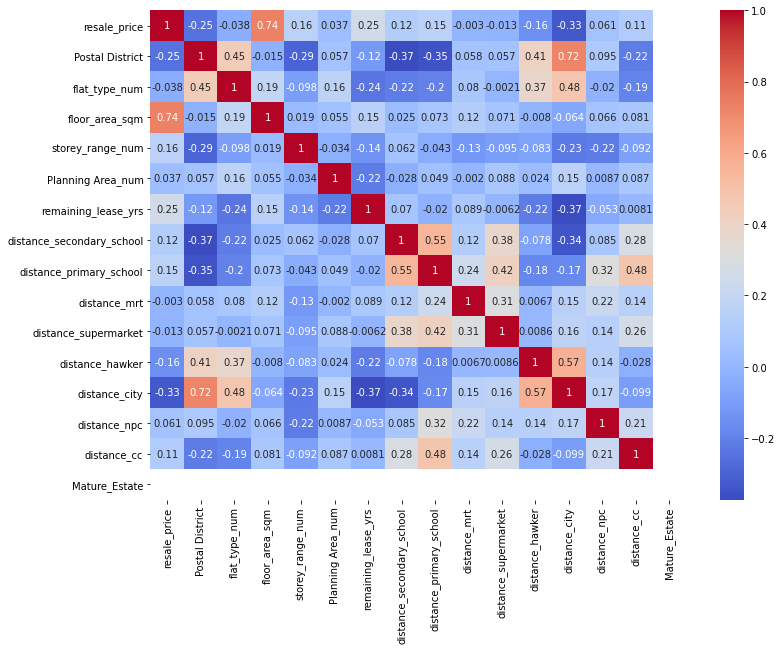

In [78]:
#Have correlation analysis for resale price with all variables:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


corrMatrix = dataset_features.corr()
test = corrMatrix.iloc[[0]]
test = test.iloc[: , 1:]

plt.subplots(figsize=(12,9))
sns.heatmap(corrMatrix, xticklabels=corrMatrix.columns, yticklabels=corrMatrix.columns, cmap='coolwarm', annot=True)

(array([0.5]), [Text(0, 0.5, 'resale_price')])

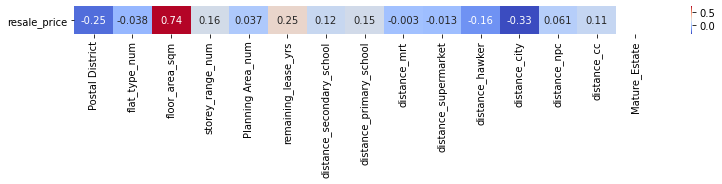

In [79]:
plt.subplots(figsize=(13,0.5))
sns.heatmap(test, xticklabels=test.columns, yticklabels=test.index, cmap='coolwarm', annot=True)
plt.yticks(rotation = 'horizontal')


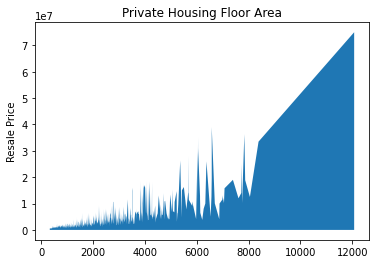

In [121]:
floor_area = merged.sort_values(by=['floor_area_sqm'])

plt.fill_between(floor_area['floor_area_sqm'], floor_area['resale_price'], lw=2)
plt.ylabel('Resale Price')
plt.title('Private Housing Floor Area')
plt.show()

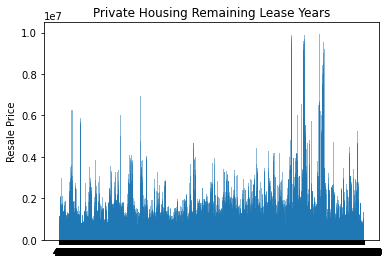

In [129]:
remaining = merged.sort_values(by=['remaining_lease_yrs'])


y_pos = np.arange(len(remaining))
plt.bar(y_pos, remaining['resale_price'], align='center', alpha=0.5,width=20)
plt.ylabel('Resale Price')
plt.xticks(y_pos, remaining['remaining_lease_yrs'])
plt.title('Private Housing Remaining Lease Years')
plt.show()





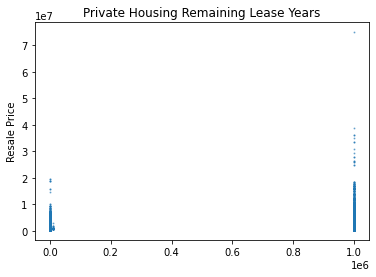

In [131]:
remaining = merged.sort_values(by=['remaining_lease_yrs'])

plt.ylabel('Resale Price')
plt.scatter(remaining['remaining_lease_yrs'], remaining['resale_price'],s=1, alpha=0.5)
plt.title('Private Housing Remaining Lease Years')
plt.show()


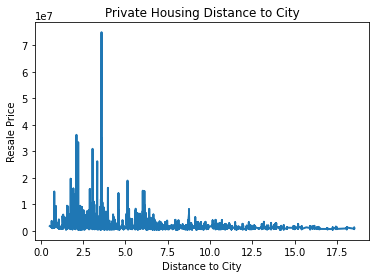

In [126]:
city = merged.sort_values(by=['distance_city'])

plt.plot(city['distance_city'], city['resale_price'], lw=2)
plt.ylabel('Resale Price')
plt.title('Private Housing Distance to City')
plt.xlabel('Distance to City')
plt.show()

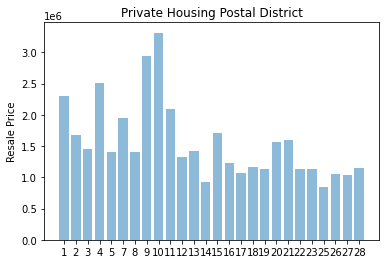

In [132]:
postal_district = merged.groupby(by = ['Postal District'])['resale_price'].mean().reset_index()
y_pos = np.arange(len(postal_district))
plt.bar(y_pos, postal_district['resale_price'], align='center', alpha=0.5)
plt.ylabel('Resale Price')
plt.xticks(y_pos, postal_district['Postal District'])
plt.title('Private Housing Postal District')
plt.show()


In [73]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor

np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(X, resale_p, test_size=.3, random_state=0)
Models = ["OLS", "AdaBoost", "Decision Tree"]
MSE_lst = []

# OLS: 
regr = linear_model.LinearRegression() # Create linear regression object
np.random.seed(100)
regr.fit(X_train, y_train) # Train the model using the training sets
y_pred_ols = regr.predict(X_test) # Make predictions using the testing set
MSE_ols = mean_squared_error(y_test, y_pred_ols) # performance statistic
MSE_lst.append(MSE_ols)

# Boosting
adaboosting = AdaBoostRegressor()
adaboosting.fit(X=X_train, y=y_train)
y_pred_boosting = adaboosting.predict(X=X_test)
MSE_adaboost = mean_squared_error(y_test, y_pred_boosting)
MSE_lst.append(MSE_adaboost)

# Bagging
bagging = BaggingRegressor(DecisionTreeRegressor())
bagging.fit(X=X_train, y=y_train)
y_pred_dt = bagging.predict(X=X_test)
MSE_bag = mean_squared_error(y_test, y_pred_dt)
MSE_lst.append(MSE_bag)


14884


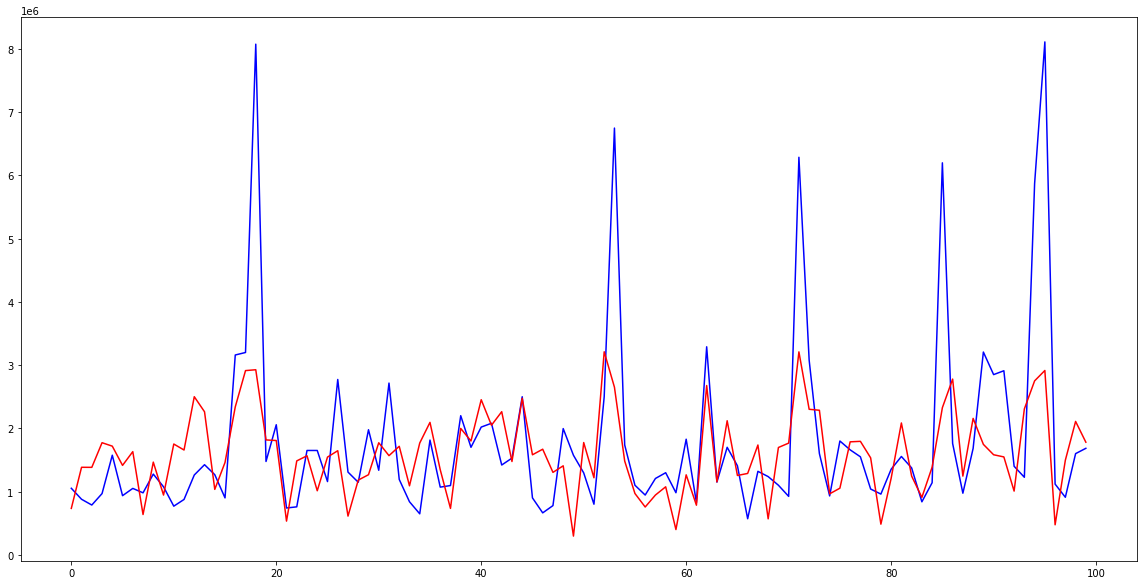

In [74]:
import matplotlib.pyplot as plt 
print(len(y_test))
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(range(len(y_test[:100])), y_test[:100], '-b',label='Actual')
ax.plot(range(len(y_pred_ols[:100])), y_pred_ols[:100], 'r', label='Predicted')
plt.show()

14884


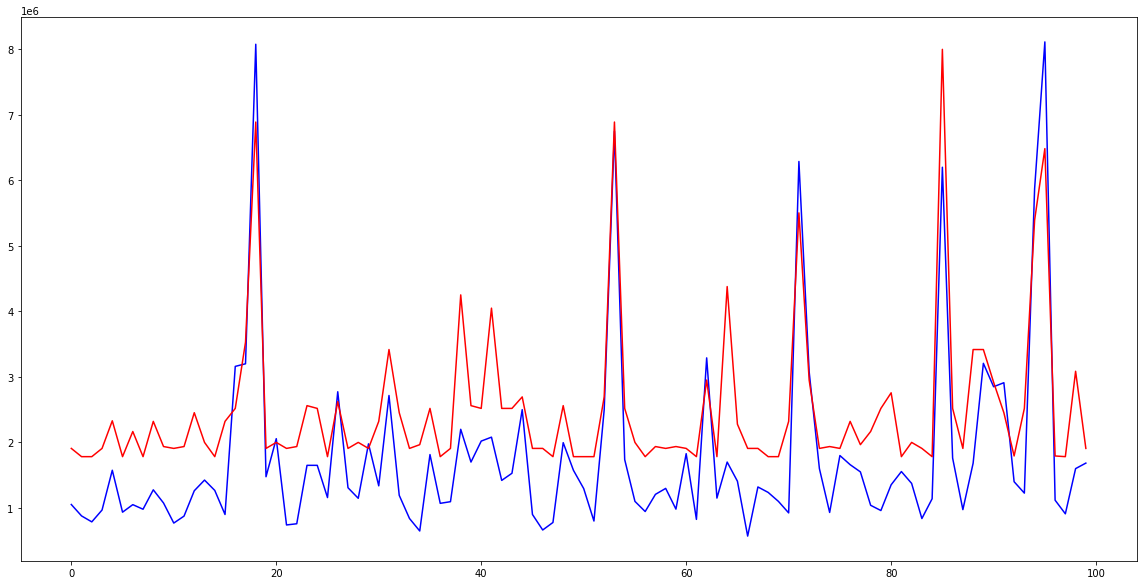

In [75]:
import matplotlib.pyplot as plt 
print(len(y_test))
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(range(len(y_test[:100])), y_test[:100], '-b',label='Actual')
ax.plot(range(len(y_pred_boosting[:100])), y_pred_boosting[:100], 'r', label='Predicted')
plt.show()

14884


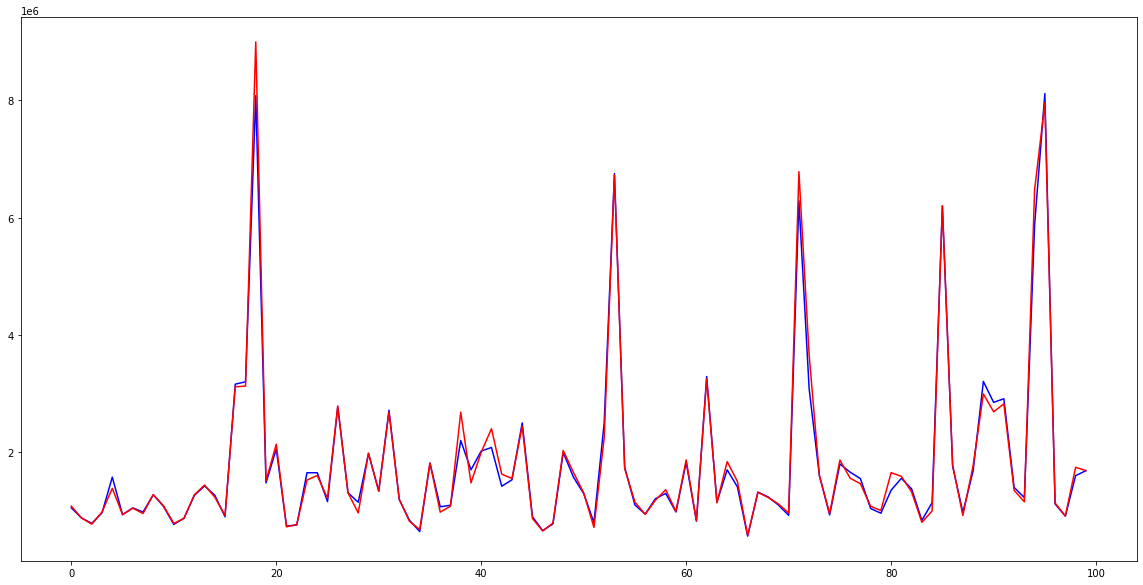

In [76]:
import matplotlib.pyplot as plt 
print(len(y_test))
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(range(len(y_test[:100])), y_test[:100], '-b',label='Actual')
ax.plot(range(len(y_pred_dt[:100])), y_pred_dt[:100], 'r', label='Predicted')
plt.show()

In [78]:
y_pred_df_ols = pd.DataFrame(y_pred_dt, columns= ['y_pred'])

print(len(y_pred_df_ols))
print(len(X_test))
pred_res1 = pd.concat([X_test,y_test], axis=1)
print(len(pred_res1))
pred_res1 = pred_res1.reset_index(drop=True)
pred_res2 = pd.concat([pred_res1,y_pred_df_ols], axis=1)
pred_res2

14884
14884
14884


,Postal District,Type_no,Floor_no,floor_area_sqm,Planning Area_no,remaining_lease_yrs,distance_secondary_school,distance_primary_school,distance_mrt,distance_supermarket,distance_hawker,distance_city,distance_npc,distance_cc,abs_price,y_pred
0,21,1,3,614,5,96,0.965771,0.937437,0.850611,0.836740,0.983230,10.904591,1.271723,0.842752,1052100.0,1.080384e+06
1,16,2,8,581,3,94,0.126861,0.879906,0.216736,0.410958,0.458674,10.899684,1.159658,0.570275,878000.0,8.780226e+05
2,16,2,8,549,3,94,0.126861,0.879906,0.216736,0.410958,0.458674,10.899684,1.159658,0.570275,787000.0,7.736289e+05
3,21,2,3,517,5,96,0.465979,0.465979,0.324448,0.250395,0.662029,9.290986,2.822672,1.004716,968000.0,9.814043e+05
4,15,2,8,1528,5,60,0.234683,0.827768,1.929943,0.071497,0.966226,8.138699,1.089698,1.661726,1575000.0,1.384119e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14879,27,3,3,1044,1,90,0.133110,0.526290,0.601434,0.748967,0.703039,16.170232,1.446312,0.747917,955000.0,9.417070e+05
14880,19,3,3,915,2,94,0.152624,0.371199,1.592004,0.348206,1.596836,9.250104,0.784600,0.477789,798400.0,7.810686e+05
14881,18,2,18,2691,3,90,1.796866,0.502011,1.397309,0.580136,4.108583,13.917269,2.602443,0.472810,2500000.0,2.218236e+06
14882,9,1,3,1066,5,999999,0.716367,0.800998,0.365491,0.180844,0.833354,2.460794,0.992006,0.658278,1760000.0,2.004464e+06


In [79]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              abs_price   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     710.9
Date:                Tue, 09 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:17:57   Log-Likelihood:            -5.3831e+05
No. Observations:               34729   AIC:                         1.077e+06
Df Residuals:                   34714   BIC:                         1.077e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

c:\python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
